In [1]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import cv2

In [2]:
def colorRange(img, min_val, max_val):
    if img >= min_val and img <= max_val:
        return img
    else:
        return 0
colorRange = np.vectorize(colorRange)

Original Image


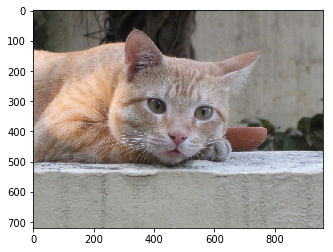

Image after ranging


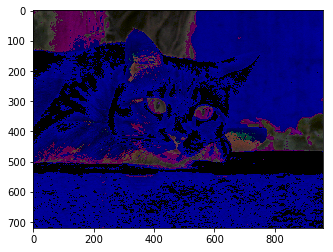

In [3]:
def colorRangeRGB(r_c, r_bw, g_c, g_bw, b_c, b_bw, image_path):
    # Find the minimun and maximum values of the range
    min_r = max(0, r_c - r_bw)
    max_r = min(255, r_c + r_bw)
    min_g = max(0, g_c - g_bw)
    max_g = min(255, g_c + g_bw)
    min_b = max(0, b_c - b_bw)
    max_b = min(255, b_c + b_bw)
    # print(min_r, max_r, min_g, max_g, min_b, max_g)
    
    # Read the image
    img = mpimg.imread(image_path)
    print("Original Image")
    plt.imshow(img)
    plt.show()
    img_ranged = np.zeros(img.shape, dtype="uint8")
    
    #Apply color ranging
    img_r, img_g, img_b = img[:,:,0], img[:,:,1], img[:,:,2]
    img_ranged[:,:,0] = colorRange(img_r, min_r, max_r)
    img_ranged[:,:,1] = colorRange(img_g, min_g, max_g)
    img_ranged[:,:,2] = colorRange(img_b, min_b, max_b)
    print("Image after ranging")
    plt.imshow(img_ranged)
    plt.show()
    
    
colorRangeRGB(50, 60, 20, 50, 90, 70, "Images/cat.ppm")

In [4]:
def colorRangeH(img, v1, v2):
    if v1 > v2:
        return img if img >= v1 or img <= v2 else 0
    else:
        return img if img >= v1 and img <= v2 else 0
colorRangeH = np.vectorize(colorRangeH)

def colorRangeSV(img, threshold):
    if img > threshold:
        return img
    else:
        return 0
colorRangeSV = np.vectorize(colorRangeSV)

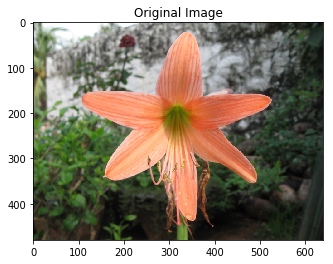

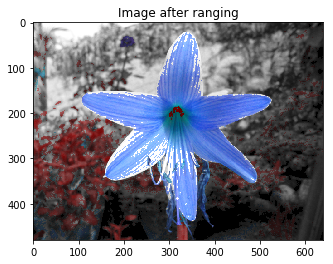

In [38]:
def colorRangeHSV(h_c, h_bw, s_c, v_c, image_path):
    # Find the minimun and maximum values of the range
    v1 = (h_c - h_bw) % 180
    v2 = (h_c + h_bw) % 180
    s_c = max(0, s_c)
    s_c = min(255, s_c)
    v_c = max(0, v_c)
    v_c = min(255, v_c)
    # print(min_r, max_r, min_g, max_g, min_b, max_g)
    
    # Read the image
    img = mpimg.imread(image_path)
    plt.title("Original Image")
    plt.imshow(img)
    plt.show()
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_ranged = np.zeros(img.shape, dtype="uint8")
    
    #Apply color ranging
    img_h, img_s, img_v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
    img_ranged[:,:,0] = colorRangeH(img_h, v1, v2)
    img_ranged[:,:,1] = colorRangeSV(img_s, s_c)
    img_ranged[:,:,2] = colorRangeSV(img_v, v_c)
    plt.title("Image after ranging")
    plt.imshow(cv2.cvtColor(img_ranged, cv2.COLOR_HSV2RGB))    
    
colorRangeHSV(120, 30, 100, 20, "Images/orange-flower.ppm")